<a href="https://colab.research.google.com/github/panzershracker/Time-series-retraining/blob/master/HW_les_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.pyplot import figure


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Домашняя работа к уроку 1**


###**1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:**

а) зависимость цены на недвижимость в еонкретном регионе от времени,

    Это временной ряд, т.к. цена зависит от времени

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

    Это НЕ временной ряд, т.к. скорость не зависит от времени.

в) количество отказов компьютера,

    Это временной ряд только в том случае, если отказы привязаны к определенным 
    временным меткам, т.е. кол-во отказов за единицу времени, иначе это не 
    временной ряд.

г) число обращений в поликлинику по району,

    Если рассматривать без привязки к временным меткам, то это НЕ временной ряд

д) координаты автобуса при движении по маршруту,

    НЕ временной ряд.

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

    НЕ временной ряд.


##**Итого:** 

    а) - да
    б) - нет
    в) - нет
    г) - нет
    д) - нет
    е) - нет 

###**2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.**

In [0]:
df = pd.read_csv('/content/drive/My Drive/DS for business Retraining/les 1/DUQ_hourly.csv')

In [9]:
df.head(3)

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0


In [10]:
df.dtypes

Datetime     object
DUQ_MW      float64
dtype: object

  Признак Datetime имеет тип object - переведем его тип в datetime.

In [0]:
col_0, col_1 = df.columns[0], df.columns[1]

In [0]:
df[col_0] = pd.to_datetime(df[col_0])

In [18]:
df.dtypes

Datetime    datetime64[ns]
DUQ_MW             float64
dtype: object

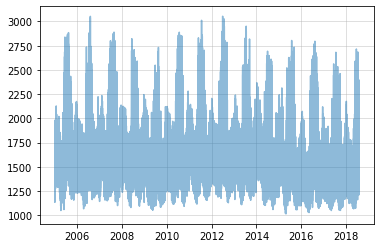

In [39]:
plt.plot(df[col_0], df[col_1], alpha=.5)
plt.grid(alpha=.5)
plt.show()

В меньшем масштабе заметны не только сезонные колебания, но и какие-то колебания с большим периодом(примерно 4 года) и меньшей амплитудой. Возможно это
какие-то другие виды сезонности (не знаю могут ли присутствовать несколько сезонностей с разным периодом и амплитудой в одном ряду) либо тренд.

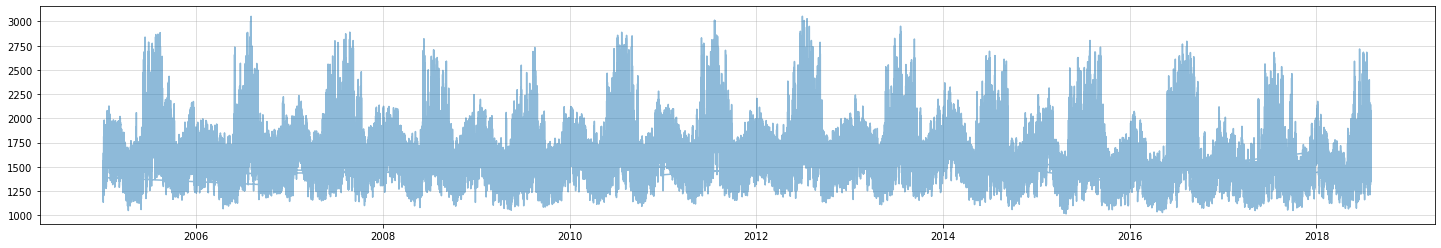

In [40]:
figure(figsize=(25,4))
plt.plot(df[col_0], df[col_1], alpha=.5)

plt.grid(alpha=.5)
plt.show()

Проверим на пропуски:

In [43]:
df.isnull().sum()

Datetime    0
DUQ_MW      0
dtype: int64

...И дубликаты.

In [87]:
df[df.duplicated([col_0], keep=False)]

,Datetime,DUQ_MW
80286,2014-11-02 02:00:00,1272.0
80287,2014-11-02 02:00:00,1240.0
89070,2015-11-01 02:00:00,1113.0
89071,2015-11-01 02:00:00,1138.0
97710,2016-11-06 02:00:00,1121.0
97711,2016-11-06 02:00:00,1107.0
106518,2017-11-05 02:00:00,1131.0
106519,2017-11-05 02:00:00,1105.0


In [50]:
df[col_0].value_counts().head(5)

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

Имеются 4 пары дубликатов. Удалим дубликаты, сохранив первые значения из пар:

In [88]:
df = df.drop_duplicates(col_0, keep='first')

df[df[col_0].duplicated() == True]

,Datetime,DUQ_MW


###**Вывод:**

    Впринципе ничего особенного, кроме нескольких повторов и какой то "глубинной" сезонности (возможно тренд).

###**3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.**

In [0]:
brent = pd.read_excel('/content/drive/My Drive/DS for business Retraining/les 1/нефть-brent 2010-2019.xlsx')

In [0]:
brent = brent.rename(columns={'Дата':'date', 'Значение':'val'}).set_index('date')

In [98]:
brent.head(2)

,val
date,
2019-09-01,58.84
2019-08-30,59.19


<Figure size 720x360 with 0 Axes>

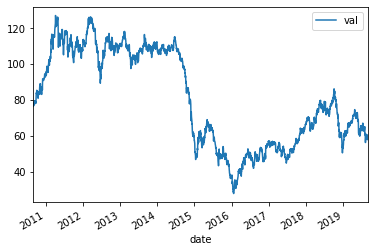

In [99]:
figure(figsize=(10,5))

brent.plot()
plt.show()

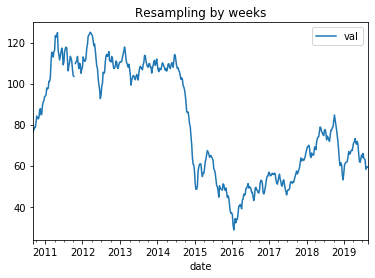

In [100]:
week_res = brent.resample('W').mean()
week_res.plot(title='Resampling by weeks')

plt.show()

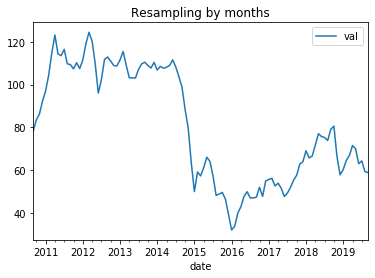

In [101]:
week_res = brent.resample('M').mean()
week_res.plot(title='Resampling by months')

plt.show()

###**4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.**

In [0]:
def std_mean_plot_res_by(period, data=brent):

  fig, ax = plt.subplots(1,2, figsize=[20,5])

  ax[0].plot(data.resample(period).mean())
  ax[1].plot(data.resample(period).std(), c='g')

  ax[0].set_title(f'mean by {period}-period')
  ax[1].set_title(f'std by {period}-period')

  return plt.show()

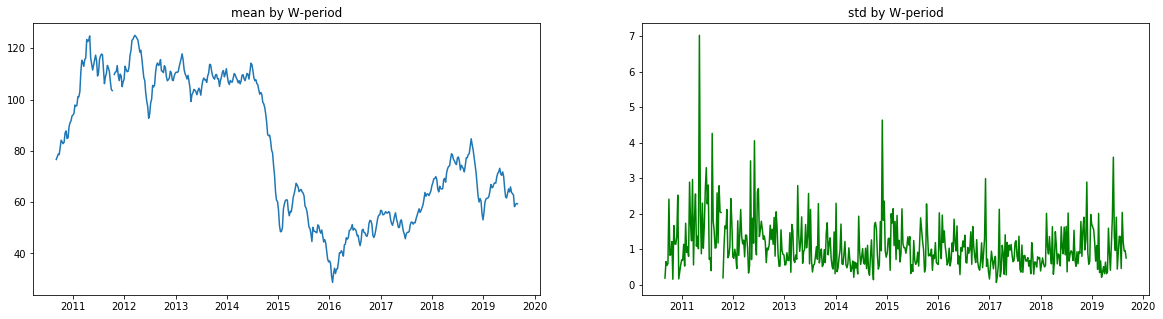

In [103]:
std_mean_plot_res_by('W')

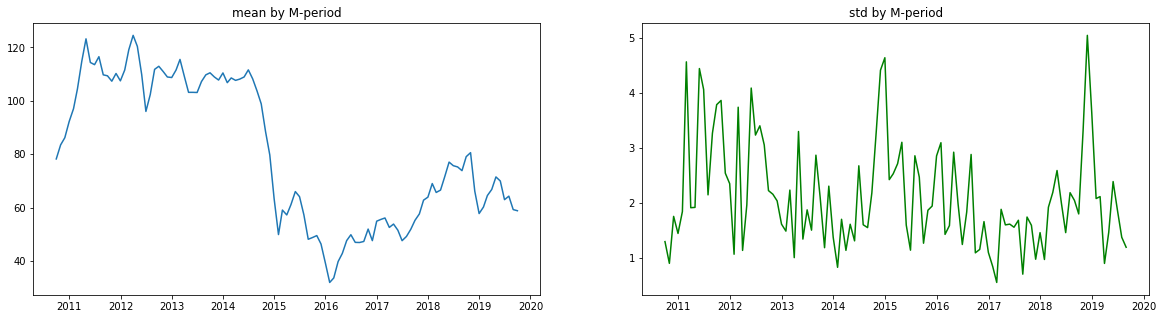

In [104]:
std_mean_plot_res_by('M')

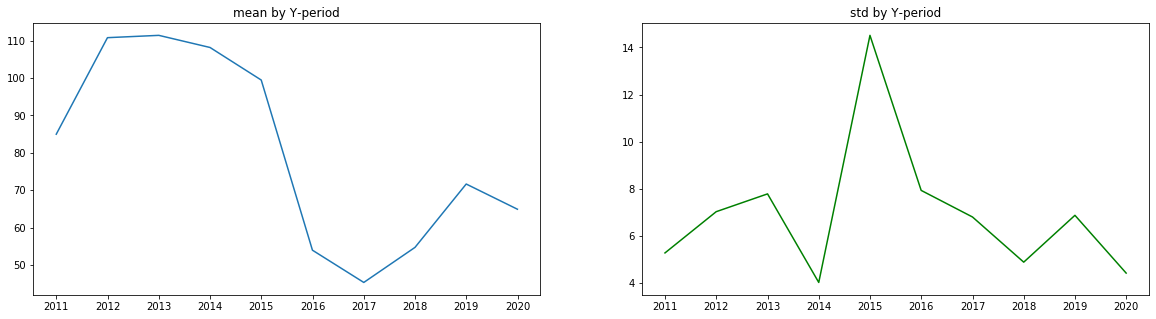

In [105]:
std_mean_plot_res_by('Y')

###**5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.**

Вывод:

    Чем больше усреднения в представлении данных - тем меньшую 
    детализацию можно получить по данным. Ресемплинг на более крупном отрезке 
    времени демонстрирует общую динамику, а при уменьшении периода более 
    уточненную,высокочастотную. Мне кажется, что в данном случае график 
    ресемплированный по годам - бесполезен, так как мало информативен.